In [131]:
import pandas as pd # Usa pandas para cargar el archivo (validar siempre la ruta)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Visualización de datos en conjunto con matplotlib
from scipy import stats #se utiliza para realizar análisis estadísticos. Es especialmente útil en trabajos de análisis de datos, pruebas de hipótesis y modelado estadístico.
import os


In [132]:
# 
report = r'Files\violencia_intrafamiliar.csv'
df = pd.read_csv(report,sep=',',dtype={'CODIGO DANE':str})
ruta_absoluta = os.path.abspath(report)
print(ruta_absoluta)
print("Data Violencia Domestica Colombia")
print(df.dtypes)
print(df.head(5))

c:\HAD\Unidad_1\Trabajo\Analitica_datos\Files\violencia_intrafamiliar.csv
Data Violencia Domestica Colombia
DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object
   DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  
0   1/01/2010  MASCULINO      ADULTOS         1  
1   1/01/2010   FEMENINO      ADULTOS         1  
2   1/01/2010  MASCULINO      ADULTOS         1  
3   1/01/2010   FEM

In [133]:
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')
df.dtypes

DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE             object
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
dtype: object

In [134]:
# Cambio de genero - No reporta
df['GENERO'] = df['GENERO'].replace('NO REPORTADO', 'NO REPORTA')

# Cambio de Grupo Etario - No Reporta
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].replace('NO REPORTADO', 'NO REPORTA')

# Cambio de tipo de Arma - Segun codigo penal
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'ARMA BLANCA / CORTOPUNZANTE':'ARMA BLANCA','-':'NO REPORTA','NO REPORTADO':'NO REPORTA','CORTOPUNZANTES':'ARMA BLANCA','CORTANTES':'ARMA BLANCA','CONTUNDENTES':'ARMA BLANCA','PUNZANTES':'ARMA BLANCA'})

In [135]:
print(df['GENERO'].unique())
print(df['GRUPO ETARIO'].unique())
print(df['ARMAS MEDIOS'].unique())

['MASCULINO' 'FEMENINO' 'NO REPORTA' '-']
['ADULTOS' 'ADOLESCENTES' 'MENORES' 'NO REPORTA' nan]
['ARMA BLANCA' 'ARMA DE FUEGO' 'NO REPORTA' 'SIN EMPLEO DE ARMAS'
 'ESCOPOLAMINA']


Tratamiento de Valores atipicos

Este cambio se basa en el analisis de la variable Cantidad de la data trabaja

Dado que cada fila del conjuto de datos reprenta un unico registro, se considera oprtuno eliminar los registros con casos superiores a 20, debido a que es absurdo pensar  que se haya notificado un unico incidente de violencia domestica com mas de 20 victimas en el mismo lugar. Esto podria deberse a un error de introducción de datos, ya que hay casos que superan los 100

In [136]:
df_filtered = df[df['CANTIDAD'] > 20]  # Filtrar filas donde 'CANTIDAD' es mayor a 20
count = df_filtered['CANTIDAD'].count()  # Contar las filas que cumplen la condición
print(count)

4625


 EDA (Exploratory Data Analysis): Se centra en explorar los datos de manera descriptiva, utilizando herramientas visuales y estadísticas para obtener una comprensión inicial de la distribución de los datos.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px # Para crear graficos interactivos con ploty, comno mapas de caloer y graficos de dispersión
import plotly.graph_objs as go

from phik import phik_matrix # Phik constante de correlación práctica que funciona de manera consistente entre variables categóricas, ordinales y de intervalo
from numpy import log10 # Proporciono funciones matematicas y un valor NaN (Nulo)
import numpy as np  
from json import load # Permite cargar datos JSON desde URLS
from seaborn import heatmap, set_theme 
from plotly.subplots import make_subplots # Crea subgraficos para disposición compleja de graficos
 
 # Configuración de Temas y Estilos
set_theme(style="ticks", context="talk", palette="tab10")
plt.rcParams.update({'font.size': 12})


Distribucción de columnas
- Podemos ver que en 2020 tuvo un gran aumento de casos, y se tiene una gran concentración de casos de 1 a 2 casos por fila 

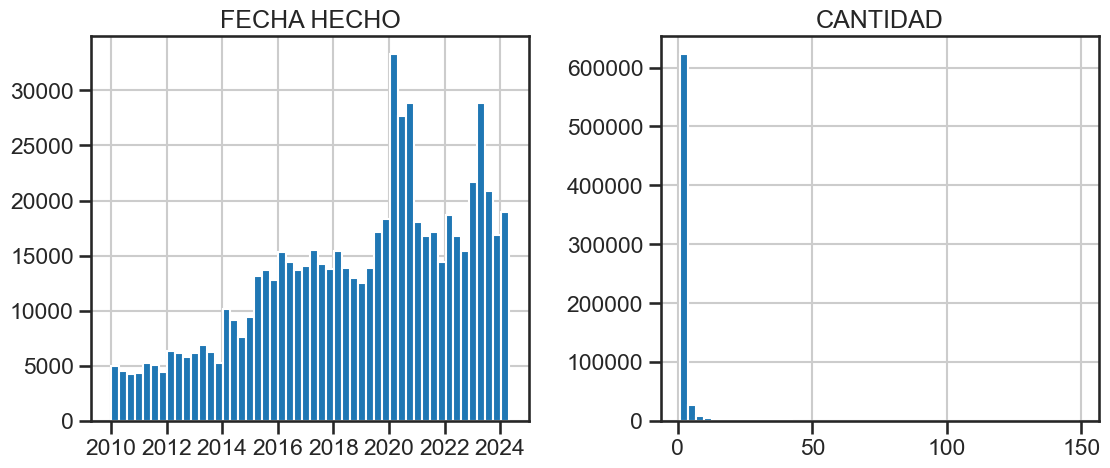

In [138]:
df.hist(figsize=(13, 5), bins=50) # histograma
plt.show()


Visualización de Datos

In [139]:
df.describe(exclude='datetime') # Resumen estadistico 

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD
count,670532,670532,670532,670532,670532,668921,670532.000000
unique,34,2027,1499,5,4,4,NaN
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA,FEMENINO,ADULTOS,NaN
freq,120385,58103,63465,350267,505169,583964,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.857515
std,NaN,NaN,NaN,NaN,NaN,NaN,4.144575
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [140]:
# ¿Que departamentos tiene mas casos y como se distribuyen?
tabla_departamento = pd.pivot_table(df, index = ('DEPARTAMENTO'), values = 'CANTIDAD', columns = None, aggfunc='count').reset_index()
tabla_departamento.sort_values(by='CANTIDAD', ascending=False)


,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,120385
1,ANTIOQUIA,83966
31,VALLE,62145
28,SANTANDER,51175
5,BOYACÁ,38134
30,TOLIMA,25156
3,ATLÁNTICO,25037
4,BOLÍVAR,22990
17,HUILA,22615
19,META,22467


Que tipo de arma es la mas comun : las armas mas utilizadas en los casos de violencia intrafamiliar en Colombia es el arma blanca, seguido del no uso de armas. 

In [141]:
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'ARMA BLANCA / CORTOPUNZANTE':'ARMA BLANCA','-':'NO REPORTA','NO REPORTADO':'NO REPORTA','CORTOPUNZANTES':'ARMA BLANCA','CORTANTES':'ARMA BLANCA','CONTUNDENTES':'ARMA BLANCA','PUNZANTES':'ARMA BLANCA'})

# tabla dinámica para contar el número de casos por tipo de arma
tipo_de_arma = pd.pivot_table(df, index='ARMAS MEDIOS', values='CANTIDAD', aggfunc='count').reset_index()

# Ordenar la tabla por la columna 'CANTIDAD' en orden descendente
tipo_de_arma.sort_values(by='CANTIDAD', ascending=False, inplace=True)

# Mostrar la tabla
print(tipo_de_arma)

          ARMAS MEDIOS  CANTIDAD
0          ARMA BLANCA    350267
4  SIN EMPLEO DE ARMAS    237096
3           NO REPORTA     76357
2         ESCOPOLAMINA      3863
1        ARMA DE FUEGO      2949


In [142]:
import plotly.express as px

print(tipo_de_arma.head())

# Crear un gráfico de barras con Plotly
tipo_de_arma_graph = px.bar(
tipo_de_arma,  # DataFrame que contiene los datos
    x='ARMAS MEDIOS',  # Columna que se usará en el eje X
    y='CANTIDAD',  # Columna que se usará en el eje Y
    text_auto='.2s',  # Mostrar valores automáticos en las barras con formato
    title='Tipo de Armas Usadas'  # Título del gráfico
)

# Actualizar el trazado para personalizar el texto
tipo_de_arma_graph.update_traces(
    textfont_size=12,  # Tamaño de la fuente del texto
    textangle=0,  # Ángulo del texto
    textposition="outside",  # Posición del texto fuera de las barras
    cliponaxis=False  # Permite que el texto sobresalga fuera del eje
)

# Mostrar el gráfico
tipo_de_arma_graph.show()
tipo_de_arma_graph.write_html('graphics/weapon.html') #usado para crear el grafico

 

          ARMAS MEDIOS  CANTIDAD
0          ARMA BLANCA    350267
4  SIN EMPLEO DE ARMAS    237096
3           NO REPORTA     76357
2         ESCOPOLAMINA      3863
1        ARMA DE FUEGO      2949


Genero

In [143]:
# Agrupar por 'GENERO' y contar la cantidad de ocurrencias en la columna 'CANTIDAD'
casos_por_genero = df.groupby('GENERO')['CANTIDAD'].count()

# Mostrar el resultado
print(casos_por_genero)


GENERO
-                  7
FEMENINO      505169
MASCULINO     164107
NO REPORTA      1249
Name: CANTIDAD, dtype: int64


In [144]:
# Crear la tabla dinámica
df_genero_armas = pd.pivot_table(
    df, 
    index=('GENERO', 'ARMAS MEDIOS'),  # Agrupar por 'GENERO' y 'ARMAS MEDIOS'
    values='CANTIDAD',  # Contar la columna 'CANTIDAD'
    aggfunc='count'  # Contar las ocurrencias
).reset_index()

# Mostrar el resultado
print(df_genero_armas)


        GENERO         ARMAS MEDIOS  CANTIDAD
0            -          ARMA BLANCA         4
1            -  SIN EMPLEO DE ARMAS         3
2     FEMENINO          ARMA BLANCA    268614
3     FEMENINO        ARMA DE FUEGO      2470
4     FEMENINO         ESCOPOLAMINA      2984
5     FEMENINO           NO REPORTA     57046
6     FEMENINO  SIN EMPLEO DE ARMAS    174055
7    MASCULINO          ARMA BLANCA     81462
8    MASCULINO        ARMA DE FUEGO       479
9    MASCULINO         ESCOPOLAMINA       877
10   MASCULINO           NO REPORTA     19203
11   MASCULINO  SIN EMPLEO DE ARMAS     62086
12  NO REPORTA          ARMA BLANCA       187
13  NO REPORTA         ESCOPOLAMINA         2
14  NO REPORTA           NO REPORTA       108
15  NO REPORTA  SIN EMPLEO DE ARMAS       952


In [145]:
# Reemplazar el valor 'NO REPORTA' por NaN en la columna 'GENERO'
df_genero_armas['GENERO'] = df_genero_armas['GENERO'].replace({'NO REPORTA': pd.NA})

# Eliminar filas donde 'GENERO' sea NaN
df_genero_armas = df_genero_armas[~df_genero_armas['GENERO'].isnull()]

# Mostrar el resultado
print(df_genero_armas)


       GENERO         ARMAS MEDIOS  CANTIDAD
0           -          ARMA BLANCA         4
1           -  SIN EMPLEO DE ARMAS         3
2    FEMENINO          ARMA BLANCA    268614
3    FEMENINO        ARMA DE FUEGO      2470
4    FEMENINO         ESCOPOLAMINA      2984
5    FEMENINO           NO REPORTA     57046
6    FEMENINO  SIN EMPLEO DE ARMAS    174055
7   MASCULINO          ARMA BLANCA     81462
8   MASCULINO        ARMA DE FUEGO       479
9   MASCULINO         ESCOPOLAMINA       877
10  MASCULINO           NO REPORTA     19203
11  MASCULINO  SIN EMPLEO DE ARMAS     62086


In [146]:
import plotly.express as px


# Crear un DataFrame con los datos necesarios
df_genero_armas = pd.pivot_table(
    df, 
    index=('GENERO', 'ARMAS MEDIOS'), 
    values='CANTIDAD', 
    aggfunc='count'
).reset_index()

# Crear un gráfico de barras 
fig_genero = px.bar(
    df_genero_armas,
    x='GENERO',  # Columna para el eje X
    y='CANTIDAD',  # Columna para el eje Y
    color='ARMAS MEDIOS',  # Columna que define los colores de las barras
    barmode='group',
    text_auto='.2s',
    title="Gráfico de género y número de casos según tipo de arma",
    labels={'CANTIDAD': 'Número de casos', 'GENERO': 'Género y Tipo de Arma'},
    height=400
)

# Personalizar el trazado del gráfico
fig_genero.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

# Mostrar el gráfico
fig_genero.show()
fig_genero.write_html('graphics/genre.html') #usado para crear el grafico




Como se relaciona el Genero con el Grupo Etario (edad)
la mayoría de los individuos afectados son mujeres adultas, mientras que el número de menores afectados varía poco entre hombres y mujeres.

In [147]:
df.groupby(['GENERO', 'GRUPO ETARIO'])['CANTIDAD'].count()

GENERO      GRUPO ETARIO
FEMENINO    ADOLESCENTES     28809
            ADULTOS         455443
            MENORES          19915
            NO REPORTA           1
MASCULINO   ADOLESCENTES     13236
            ADULTOS         128503
            MENORES          21765
NO REPORTA  ADULTOS             18
            MENORES              2
            NO REPORTA        1229
Name: CANTIDAD, dtype: int64

In [148]:
# Crear la tabla dinámica
df_genero_edad = pd.pivot_table(
    df, 
    index=('GENERO', 'GRUPO ETARIO'),  # Agrupa por 'GENERO' y 'GRUPO ETARIO'
    values='CANTIDAD',  # Contar la columna 'CANTIDAD'
    aggfunc='count'  # Función de conteo
).reset_index()

# Mostrar el resultado
print(df_genero_edad)


       GENERO  GRUPO ETARIO  CANTIDAD
0    FEMENINO  ADOLESCENTES     28809
1    FEMENINO       ADULTOS    455443
2    FEMENINO       MENORES     19915
3    FEMENINO    NO REPORTA         1
4   MASCULINO  ADOLESCENTES     13236
5   MASCULINO       ADULTOS    128503
6   MASCULINO       MENORES     21765
7  NO REPORTA       ADULTOS        18
8  NO REPORTA       MENORES         2
9  NO REPORTA    NO REPORTA      1229


In [149]:
import plotly.express as px

df_genero_edad = pd.pivot_table(
    df, 
    index=('GENERO', 'GRUPO ETARIO'), 
    values='CANTIDAD', 
    aggfunc='count'
).reset_index()

# Crear un gráfico de barras adaptado a tu archivo
fig_genero_edad = px.bar(
    df_genero_edad,
    x='GENERO',  # Columna para el eje X (género)
    y='CANTIDAD',  # Columna para el eje Y (cantidad de casos)
    color='GRUPO ETARIO',  # Columna que define los colores de las barras (grupo etario)
    barmode='group',
    text_auto='.2s',
    title="Gráfico de género y número de casos por grupo etario",
    labels={'CANTIDAD': 'Número de casos', 'GENERO': 'Género'},
    height=400
)

# Personalizar el trazado del gráfico
fig_genero_edad.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

# Mostrar el gráfico
fig_genero_edad.show()
fig_genero_edad.write_html('graphics/age.html') #usado para crear el grafico



In [150]:
# Convertir la columna 'FECHA HECHO' a formato datetime
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])

# Crear columnas con el nombre del día y el mes
df['DIA'] = df['FECHA HECHO'].dt.day_name()
df['MES'] = df['FECHA HECHO'].dt.month_name()

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())


   DEPARTAMENTO          MUNICIPIO CODIGO DANE ARMAS MEDIOS FECHA HECHO  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA  2010-01-01   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA  2010-01-01   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA  2010-01-01   
3      CASANARE               MANÍ    85139000  ARMA BLANCA  2010-01-01   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA  2010-01-01   

      GENERO GRUPO ETARIO  CANTIDAD     DIA      MES  
0  MASCULINO      ADULTOS         1  Friday  January  
1   FEMENINO      ADULTOS         1  Friday  January  
2  MASCULINO      ADULTOS         1  Friday  January  
3   FEMENINO      ADULTOS         1  Friday  January  
4   FEMENINO      ADULTOS         1  Friday  January  


In [151]:
import pandas as pd
import plotly.express as px

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')
df.dtypes

# Asegurarte de que la columna 'FECHA HECHO' esté en formato datetime
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])

# Agrupar los datos por mes y año y sumar la cantidad de casos
df_tendencia = df.resample('ME', on='FECHA HECHO')['CANTIDAD'].sum().reset_index()

# Crear un gráfico interactivo con plotly
fig = px.line(
    df_tendencia,
    x='FECHA HECHO',
    y='CANTIDAD',
    title='Tendencia de los casos a lo largo del tiempo',
    labels={'CANTIDAD': 'Cantidad de casos', 'FECHA HECHO': 'Fecha'}
)

fig.update_traces(mode='lines+markers')
fig.show()
fig.write_html('graphics/overtime.html') #usado para crear el grafico


In [152]:
import pandas as pd
import plotly.express as px

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')

# Crear una columna para el nombre del mes y otra para el nombre del día de la semana
df['MES'] = df['FECHA HECHO'].dt.month_name()
df['DIA'] = df['FECHA HECHO'].dt.day_name()

# Agrupar por mes y sumar la cantidad de casos
df_mes = df.groupby('MES')['CANTIDAD'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]).reset_index()

# Agrupar por día de la semana y sumar la cantidad de casos
df_dia = df.groupby('DIA')['CANTIDAD'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Crear el gráfico de tendencia por mes
fig_mes = px.bar(
    df_mes,
    x='MES',
    y='CANTIDAD',
    title='Tendencia de los casos por mes',
    labels={'CANTIDAD': 'Cantidad de casos', 'MES': 'Mes'},
    text_auto=True
)
fig_mes.update_traces(marker_color='skyblue')
fig_mes.show()
fig_mes.write_html('graphics/month.html') #usado para crear el grafico carpeta/nombre.html


# Crear el gráfico de tendencia por día de la semana
fig_dia = px.bar(
    df_dia,
    x='DIA',
    y='CANTIDAD',
    title='Tendencia de los casos por día de la semana',
    labels={'CANTIDAD': 'Cantidad de casos', 'DIA': 'Día de la semana'},
    text_auto=True
)
fig_dia.update_traces(marker_color='lightgreen')
fig_dia.show()
fig_dia.write_html('graphics/day.html') #usado para crear el grafico carpeta/nombre.html

